# **Loading DataSet**

In [39]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 90%|███████████████████████████████████    | 78.0M/86.8M [00:00<00:00, 182MB/s]
100%|███████████████████████████████████████| 86.8M/86.8M [00:00<00:00, 161MB/s]


# **Now unzip file**

In [3]:
import zipfile
import os

# Unzip the file
zip_file = '/kaggle/working/brain-tumor-classification-mri.zip'  # Replace with your actual zip file name

# Ensure the file exists before attempting to unzip
if os.path.exists(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('/kaggle/working/')  # Extract files to a directory
else:
    print("The zip file does not exist.")

In [4]:
traning_data="/kaggle/working/Training"
testing_data="/kaggle/working/Testing"

In [109]:
os.listdir(traning_data), os.listdir(testing_data)

(['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor'],
 ['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor'])

In [6]:
total=0
for i in os.listdir(traning_data):
    print(i,len(os.listdir(os.path.join(traning_data,i))))
    total+=len(os.listdir(os.path.join(traning_data,i)))
print("Total images in Training Data :",total)

meningioma_tumor 822
pituitary_tumor 827
glioma_tumor 826
no_tumor 395
Total images in Training Data : 2870


In [7]:
total1=0
for i in os.listdir(testing_data):
    print(i,len(os.listdir(os.path.join(testing_data,i))))
    total1+=len(os.listdir(os.path.join(testing_data,i)))
print("Total images in Training Data :",total1)

meningioma_tumor 115
pituitary_tumor 74
glioma_tumor 100
no_tumor 105
Total images in Training Data : 394


In [8]:
import numpy as np
import cv2
from sklearn.utils import shuffle

In [9]:
X_train_data=[]
y_train_data_lable=[]
Labls=['pituitary_tumor', 'glioma_tumor', 'no_tumor', 'meningioma_tumor']

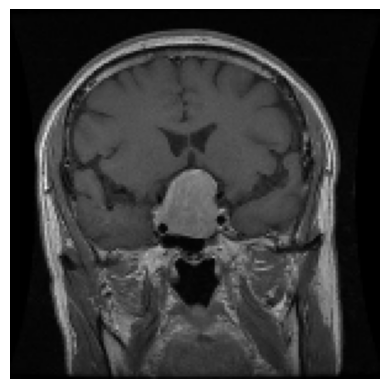

(150, 150, 3)

In [10]:
import cv2
import matplotlib.pyplot as plt

# Read and resize the image
img = cv2.imread("/kaggle/working/Training/pituitary_tumor/p (472).jpg")
img = cv2.resize(img, (150, 150))

# Convert BGR to RGB (since OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()
img.shape

In [25]:
img.shape

(150, 150, 3)

In [11]:
for index, label in enumerate(Labls):
    
    path=os.path.join(traning_data,label)    
    for j in os.listdir(path):
        imag_path=os.path.join(path,j)
        img=cv2.imread(imag_path)
        img=cv2.resize(img,(150,150))
        X_train_data.append(img)
        y_train_data_lable.append(index)

In [12]:
for index, label in enumerate(Labls):
    
    path=os.path.join(testing_data,label)    
    for j in os.listdir(path):
        imag_path=os.path.join(path,j)
        img=cv2.imread(imag_path)
        img=cv2.resize(img,(150,150))
        X_train_data.append(img)
        y_train_data_lable.append(index)

    

In [13]:
len(X_train_data)

3264

In [14]:
len(X_train_data)

3264

In [51]:
len(y_train_data_lable)

2870

# **Now Shuffle the Item**

In [15]:
X_train_data=np.array(X_train_data)
y_train_data_lable=np.array(y_train_data_lable)

In [69]:
X_Train=[]
Y_train=[]

In [16]:
X_Train,Y_train=shuffle(X_train_data,y_train_data_lable,random_state=101)
X_Train.shape,Y_train.shape

((3264, 150, 150, 3), (3264,))

**Now Applay Train Test spliting**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_Train, Y_train, random_state=101, test_size=0.1, stratify=Y_train)

In [19]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (2937, 150, 150, 3)
x_test shape: (327, 150, 150, 3)
y_train shape: (2937,)
y_test shape: (327,)


In [27]:
from tensorflow.keras.utils import to_categorical

In [35]:
y_train_categorical_from =to_categorical(y_train)
y_test_categorical_from =to_categorical(y_test)

In [36]:
y_test_categorical_from


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [34]:
y_train_categorical_from

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

# **Now Buliding the Model**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [37]:
def get_model():

    # Define the Sequential model
    model = Sequential()

    # Add convolutional layers with ReLU activation
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Flatten the output from the convolutional layers
    model.add(Flatten())

    # Add fully connected (dense) layers with ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))

    # Output layer with softmax activation for multi-class classification
    model.add(Dense(4, activation='softmax'))

    # Print the model summary
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    
    return model


In [40]:
My_model1=get_model()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

# **Training a Model First Time**

In [42]:
History1=My_model1.fit(x_train,y_train_categorical_from,epochs=20,validation_split=0.1)

Epoch 1/20


I0000 00:00:1724870926.400198     398 service.cc:145] XLA service 0x7a10b801ab80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724870926.400249     398 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724870926.400252     398 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/83 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.2578 - loss: 14.6006 

I0000 00:00:1724870943.516303     398 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - accuracy: 0.2729 - loss: 3.4254 - val_accuracy: 0.3061 - val_loss: 1.3514
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3204 - loss: 1.3547 - val_accuracy: 0.4422 - val_loss: 1.3021
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4361 - loss: 1.2404 - val_accuracy: 0.5000 - val_loss: 1.0650
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.5584 - loss: 0.9956 - val_accuracy: 0.5510 - val_loss: 0.9056
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.6183 - loss: 0.8636 - val_accuracy: 0.6259 - val_loss: 0.8075
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.6716 - loss: 0.7564 - val_accuracy: 0.6395 - val_loss: 0.7736
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7045 - loss: 0.6916 - val_accuracy: 0.7211 - val_loss: 0.6630
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7784 - loss: 0.5524 - val_accuracy: 0.7789 - val_loss:

In [74]:
Result1=History1

# **Model 1 Training  Result**

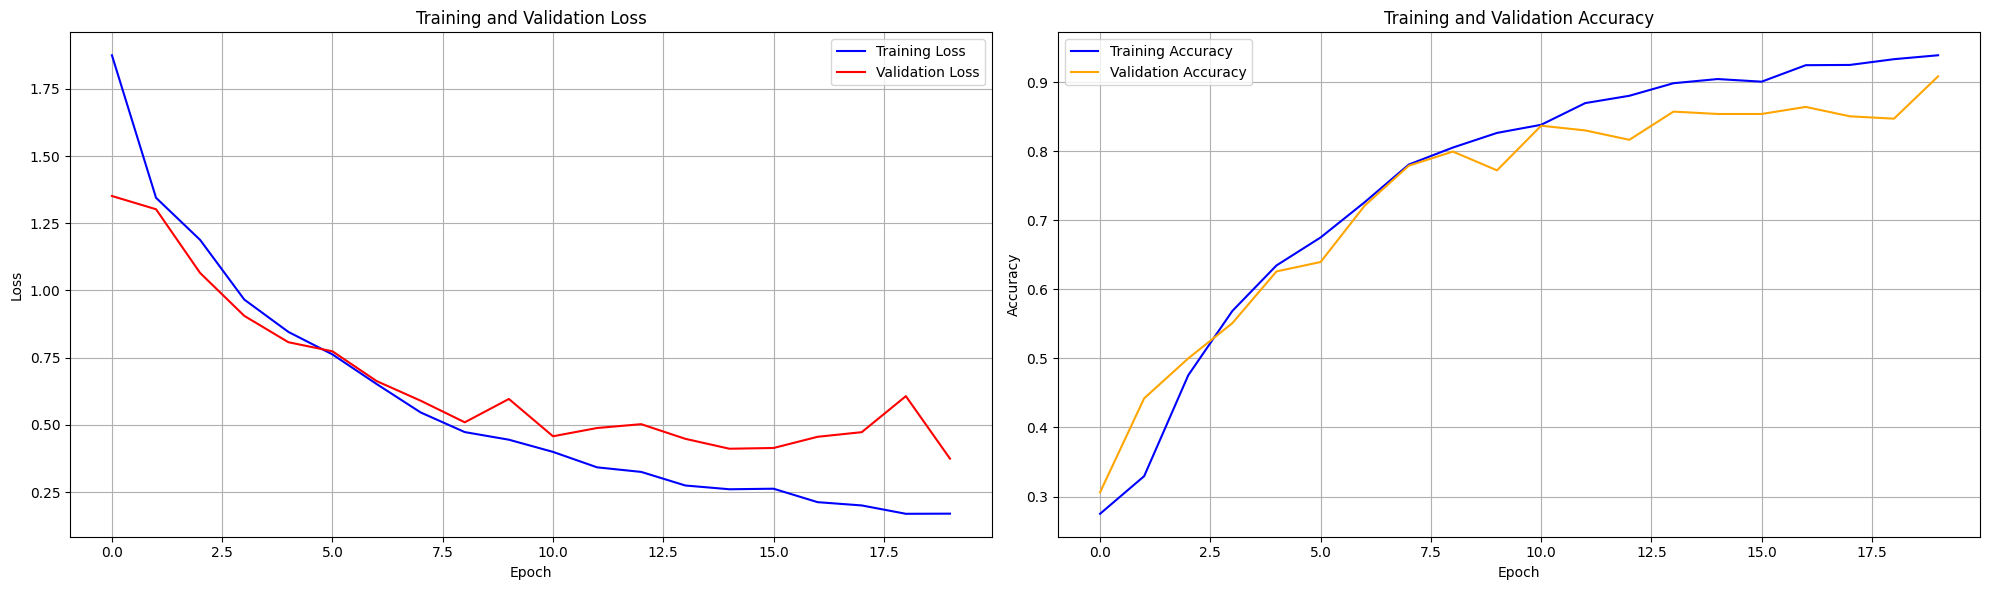

In [43]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    # Plot training and validation accuracy
    ax2.plot(accuracy, label='Training Accuracy', color='blue')
    ax2.plot(val_accuracy, label='Validation Accuracy', color='orange')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
plot_training_history(History1)

**Model 1 Evluation**

In [46]:
# Evaluate the model on the test data
test_loss, test_accuracy = My_model1.evaluate(x_test, y_test_categorical_from)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.9143 - loss: 0.4612
Test Loss: 0.4690
Test Accuracy: 0.9052


# **Confusion Matrix for Model 1**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Total Predictions: 327
Correct Predictions: 296
Incorrect Predictions: 31
Accuracy: 0.9052


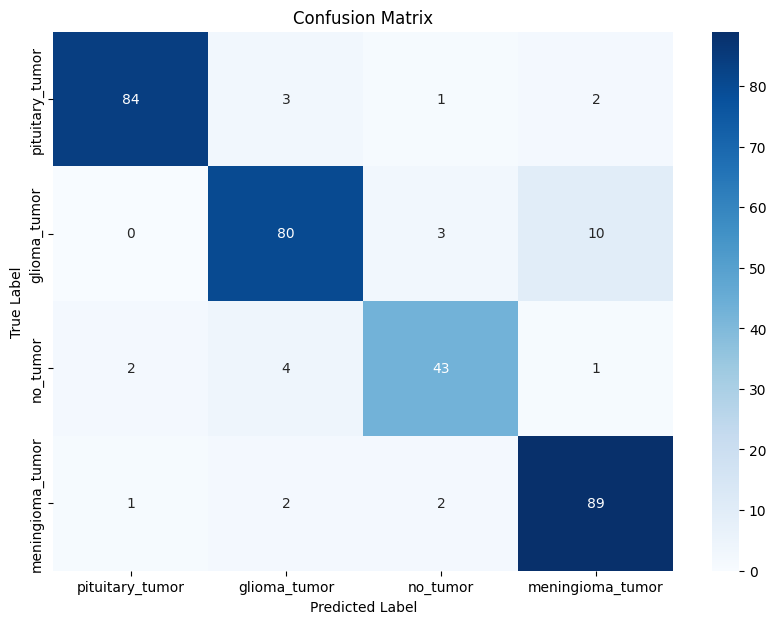

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class labels
labels = ['pituitary_tumor', 'glioma_tumor', 'no_tumor', 'meningioma_tumor']

# Step 1: Make predictions on the test data
y_pred_prob = My_model1.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Convert true labels to class labels if needed
y_true = np.argmax(y_test_categorical_from, axis=1)

# Step 3: Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate correct and incorrect predictions
correct_predictions = np.sum(np.diag(cm))  # Sum of diagonal elements
total_predictions = np.sum(cm)  # Total number of predictions
incorrect_predictions = total_predictions - correct_predictions

# Print overall summary
print(f"Total Predictions: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")
print(f"Accuracy: {correct_predictions / total_predictions:.4f}")

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# **Save Model**

In [51]:
My_model1.save('Brain_Tumor_Detection_Model.h5')

In [67]:
img = cv2.imread('/kaggle/working/Testing/meningioma_tumor/image(96).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [68]:

img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

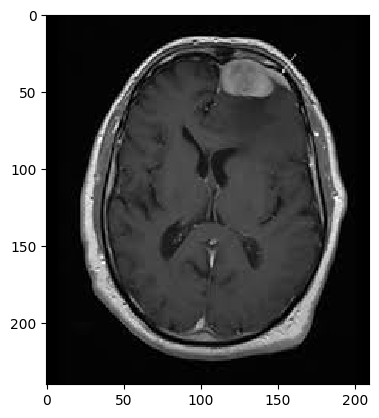

In [69]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/working/Testing/meningioma_tumor/image(96).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [70]:
a=My_model1.predict(img_array)
print(a)
indices = a.argmax()
class_name=labels[indices]
print(class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.00878217 0.14765981 0.79656214 0.0469959 ]]
no_tumor


In [73]:
img = cv2.imread('/kaggle/working/Testing/meningioma_tumor/image.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)

img_array = img_array.reshape(1,150,150,3)
a=My_model1.predict(img_array)
print(a)
indices = a.argmax()
class_name=labels[indices]
print(class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.00107389 0.1938479  0.03682137 0.76825684]]
meningioma_tumor


# **Model 2 Buliding**

In [99]:
def get_mode2():

    # Define the Sequential model
    model = Sequential()

    # Add convolutional layers with ReLU activation
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Flatten the output from the convolutional layers
    model.add(Flatten())

    # Add fully connected (dense) layers with ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dense(532, activation='relu'))
    model.add(Dropout(0.3))

    # Output layer with softmax activation for multi-class classification
    model.add(Dense(4, activation='softmax'))

    # Print the model summary
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    
    return model


In [104]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=4,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [105]:
My_model2=get_mode2()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 70, 70, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 33, 33, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 31, 31, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 13, 13, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 532)            │       272,916 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 532)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 4)              │         2,132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,678,568 (17.85 MB)

 Trainable params: 4,678,568 (17.85 MB)

 Non-trainable params: 0 (0.00 B)

# **Model 2 training**

In [107]:
History2=My_model2.fit(x_train,y_train_categorical_from,epochs=20,validation_split=0.1,callbacks=[early_stopping] )

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 25s 183ms/step - accuracy: 0.2880 - loss: 10.1028 - val_accuracy: 0.4218 - val_loss: 1.3165
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4629 - loss: 1.2289 - val_accuracy: 0.5680 - val_loss: 1.1475
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5511 - loss: 1.0399 - val_accuracy: 0.5578 - val_loss: 0.9972
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6256 - loss: 0.8878 - val_accuracy: 0.5782 - val_loss: 0.8885
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6814 - loss: 0.7588 - val_accuracy: 0.6701 - val_loss: 0.7578
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7458 - loss: 0.6292 - val_accuracy: 0.6633 - val_loss: 0.8247
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7437 - loss: 0.6459 - val_accuracy: 0.6701 - val_loss: 0.7351
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8026 - loss: 0.5237 - val_accuracy: 0.7619 

In [98]:
Result2=History2

In [102]:
Result3=History2

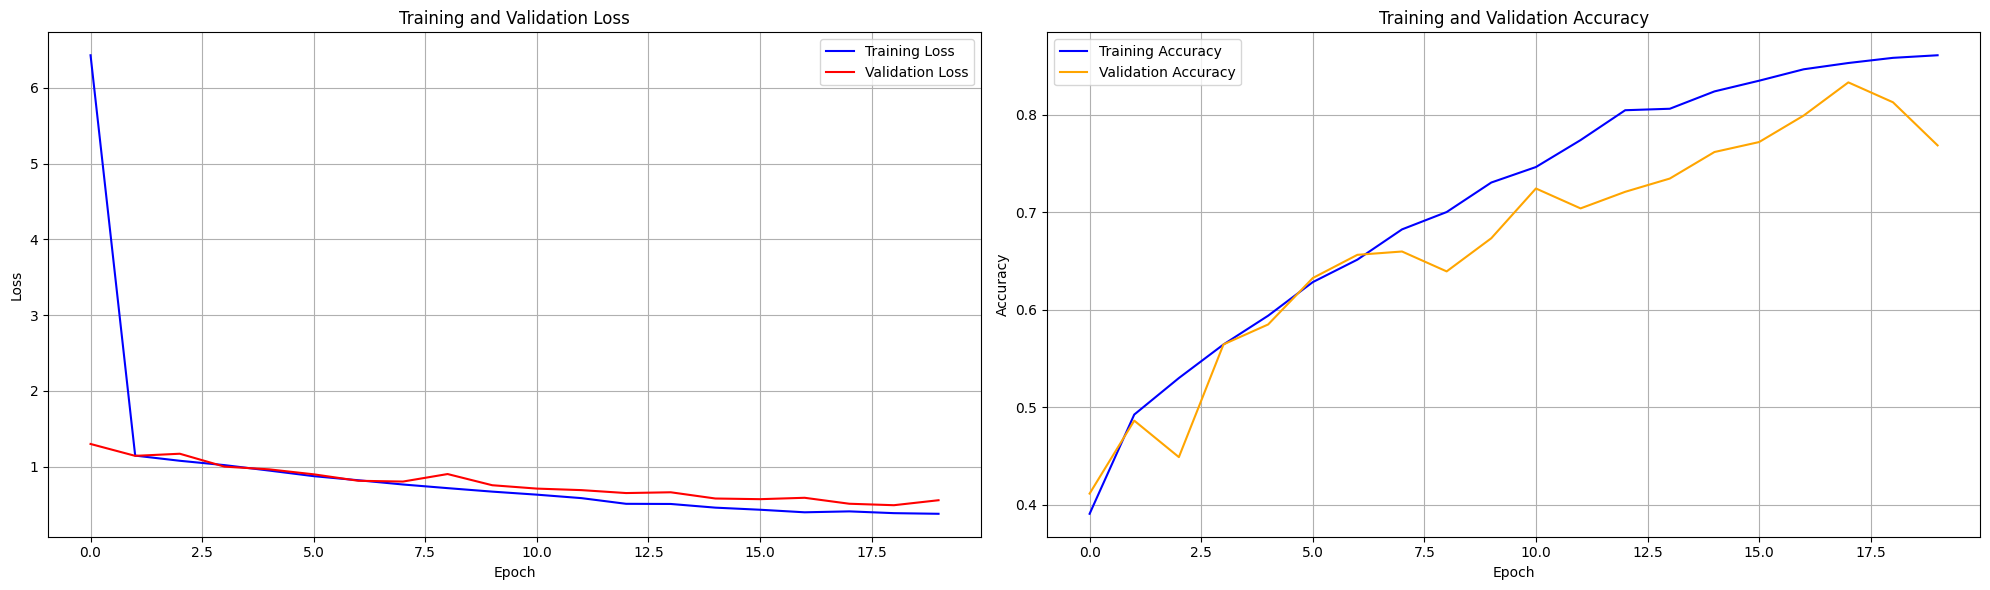

In [96]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    # Plot training and validation accuracy
    ax2.plot(accuracy, label='Training Accuracy', color='blue')
    ax2.plot(val_accuracy, label='Validation Accuracy', color='orange')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
plot_training_history(History2)

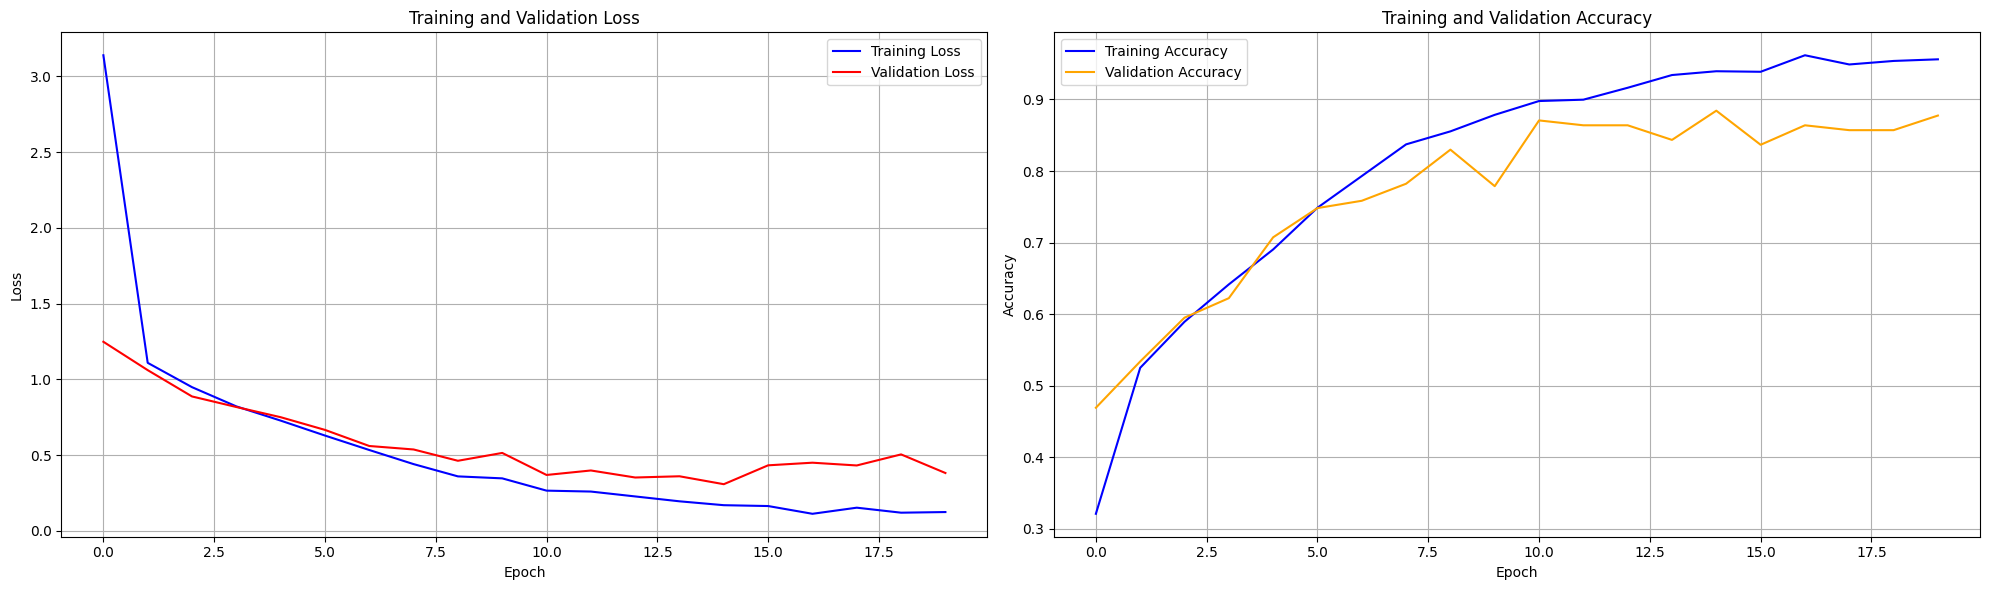

In [103]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    # Plot training and validation accuracy
    ax2.plot(accuracy, label='Training Accuracy', color='blue')
    ax2.plot(val_accuracy, label='Validation Accuracy', color='orange')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
plot_training_history(History2)

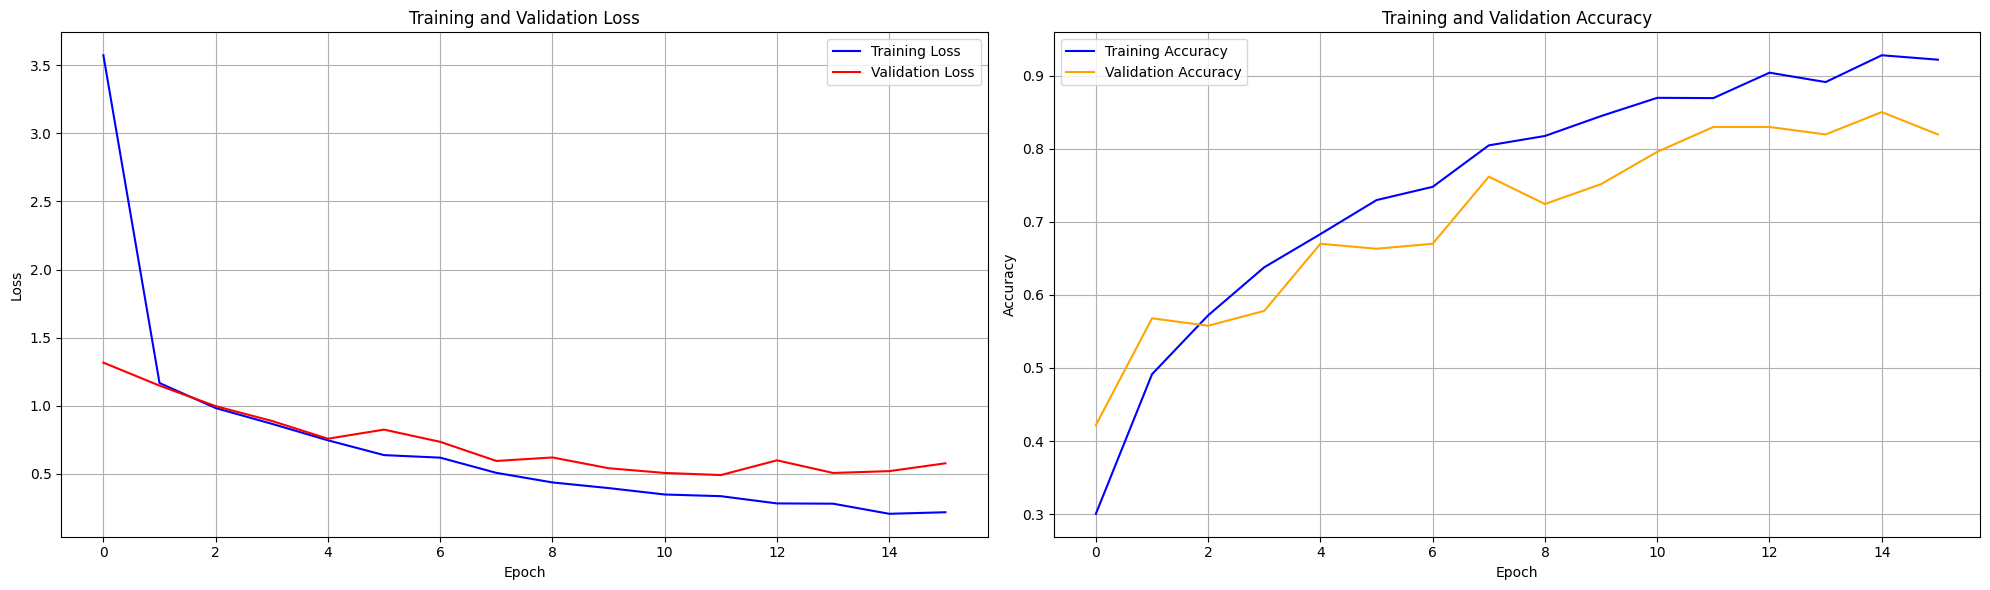

In [108]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    # Plot training and validation accuracy
    ax2.plot(accuracy, label='Training Accuracy', color='blue')
    ax2.plot(val_accuracy, label='Validation Accuracy', color='orange')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
plot_training_history(History2)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Total Predictions: 327
Correct Predictions: 248
Incorrect Predictions: 79
Accuracy: 0.7584


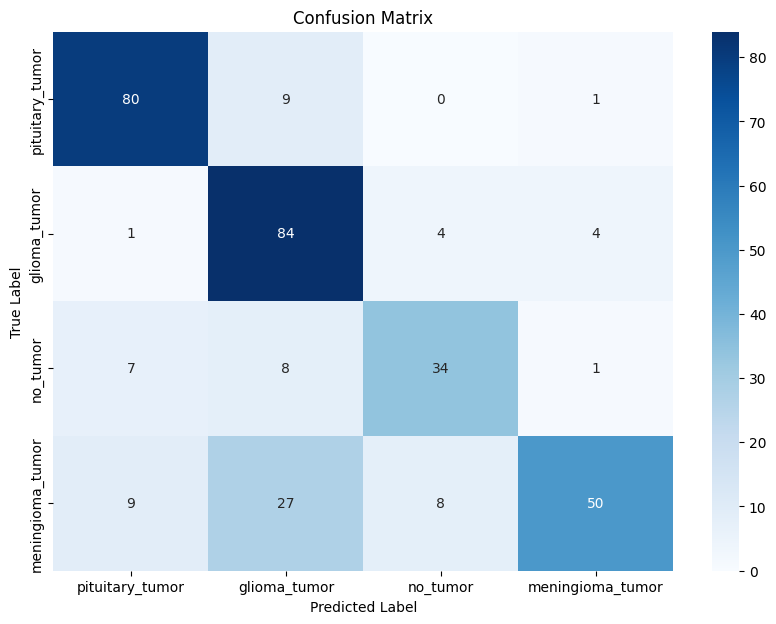

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class labels
labels = ['pituitary_tumor', 'glioma_tumor', 'no_tumor', 'meningioma_tumor']

# Step 1: Make predictions on the test data
y_pred_prob = My_model2.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Convert true labels to class labels if needed
y_true = np.argmax(y_test_categorical_from, axis=1)

# Step 3: Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate correct and incorrect predictions
correct_predictions = np.sum(np.diag(cm))  # Sum of diagonal elements
total_predictions = np.sum(cm)  # Total number of predictions
incorrect_predictions = total_predictions - correct_predictions

# Print overall summary
print(f"Total Predictions: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")
print(f"Accuracy: {correct_predictions / total_predictions:.4f}")

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
